In [1]:
import osmnx as ox
import geopandas as gpd

In [4]:
us_ufa = gpd.read_file('../data/d01_raw/FUA shapefiles/USA_core_commuting.shx')
boston_ufa = us_ufa.loc[us_ufa['fuaname'] == 'Boston'].reset_index()

In [8]:
boston_ufa = us_ufa.loc[us_ufa['fuaname'] == 'Boston'].reset_index()

<AxesSubplot:>

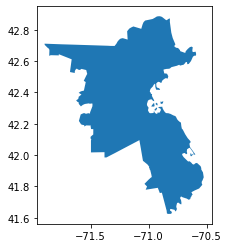

In [9]:
boston_ufa.plot()

Old code to convert latlong points to nodes in the graph (do not need that step)

In [ ]:
#from shapely.geometry import Point
#
## turn lat/lng lists into list of shapely points
#origin_longs, origin_lats = boston_od_df.intptlon.values, boston_od_df.intptlat.values
#dest_longs, dest_lats = boston_od_df.longitude.values, boston_od_df.latitude.values
#
#origin_pts_list = [Point((lng, lat)) for lng,lat in zip(origin_longs, origin_lats)]
#dest_pts_list = [Point((lng, lat)) for lng,lat in zip(dest_longs, dest_lats)]
#
##then turn list into GeoSeries:
#origin_pts = gpd.GeoSeries(origin_pts_list, crs='epsg:4326')
#dest_pts = gpd.GeoSeries(dest_pts_list, crs='epsg:4326')
#
##convert to graph crs:
#origin_pts_proj = origin_pts.to_crs(boston_walk_graph_proj.graph['crs'])
#dest_pts_proj = dest_pts.to_crs(boston_walk_graph_proj.graph['crs'])

#We do not need to do that step. The nearest nodes function already converts the lat long if we use the unprojected graph, which is less prone to mistake.

Checking what fuas we already have:

In [14]:
with open('../output.txt') as f:
    f_lines = f.readlines()
    good_fuas = [line.split('_')[0] for line in f_lines[1:]]

with open('../data/d02_processed-safegraph/safegraph_fua.txt') as g:
    g_lines = g.readlines()
    all_fuas = [line.split('_')[0].strip('\n') for line in g_lines]
    

def num(code):
    return int(code[3:])

good_fuas.sort(key=num)
all_fuas.sort(key=num)

In [19]:
remaining = list(set(all_fuas) - set(good_fuas))
remaining.sort(key=num)

In [20]:
remaining

['USA01', 'USA02', 'USA03', 'USA04', 'USA07', 'USA08', 'USA12', 'USA56']

In [21]:
outfile = open('../src/second_run.txt', 'w')
print('\n'.join(str(i) for i in remaining), file=outfile)
outfile.close()

In [1]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
od_matrix = pd.read_csv('../data/d02_processed-safegraph/weeks_od_us_fua.csv')

In [6]:
od_matrix[od_matrix.fuacode=='USA80'].reset_index(drop=True)

,safegraph_place_id,census_block_group,top_category,latitude,longitude,fuacode,intptlat,intptlon
0,sg:001855be013b421688f5f8c2e724d076,550250114021,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.126509,-89.271130
1,sg:001855be013b421688f5f8c2e724d076,550250022003,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.120499,-89.366947
2,sg:001855be013b421688f5f8c2e724d076,550250115032,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.201220,-89.244345
3,sg:001855be013b421688f5f8c2e724d076,550250118001,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,43.214106,-89.098972
4,sg:001855be013b421688f5f8c2e724d076,551050029003,Restaurants and Other Eating Places,43.172181,-89.265802,USA80,42.783193,-89.312406
...,...,...,...,...,...,...,...,...
39488,sg:99688b865e1a4daa954a97821eb8318e,550659701001,"Museums, Historical Sites, and Similar Institu...",43.038467,-89.502189,USA80,42.784017,-89.892506
39489,sg:99688b865e1a4daa954a97821eb8318e,550250004072,"Museums, Historical Sites, and Similar Institu...",43.038467,-89.502189,USA80,43.040396,-89.499626
39490,sg:99688b865e1a4daa954a97821eb8318e,550250010002,"Museums, Historical Sites, and Similar Institu...",43.038467,-89.502189,USA80,43.054659,-89.435171
39491,sg:99688b865e1a4daa954a97821eb8318e,550250006001,"Museums, Historical Sites, and Similar Institu...",43.038467,-89.502189,USA80,43.032810,-89.452007
